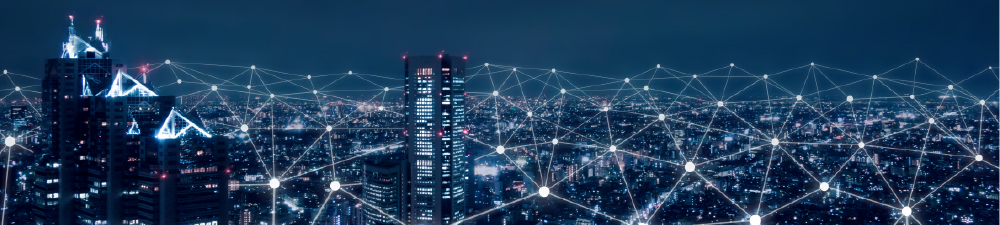

# Mini Project 3  - IU 4.6 Machine Learning

## Packages and setup

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from scipy.stats import shapiro, chi2_contingency
import scipy.stats as stats
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

#theme setting
sns.set_style('darkgrid')
sns.set_palette("cubehelix")

## Reading data and initial processing

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
#edit the file location of raw data set
cust_df=pd.read_csv("Mini_Project_3_Data.csv") 

In [4]:
cust_df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


## Exercise

## Placeholder for your analysis

In [5]:
# Type your code here to explore and understand the data better

#e.g., identify the dimension of cust_df
cust_df.shape

cust_df.info()
# Monthly Revenue till Roaming calls has (51047-50891 = 156 null values)
# PercChangeMinutes and PerChangeRevenues have (51047 - 50680 = 367 null values)

cust_df.nunique()



(51047, 58)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

CustomerID                   51047
Churn                            2
MonthlyRevenue               12665
MonthlyMinutes                2719
TotalRecurringCharge           214
DirectorAssistedCalls          146
OverageMinutes                 746
RoamingCalls                   530
PercChangeMinutes             2262
PercChangeRevenues            2899
DroppedCalls                   285
BlockedCalls                   373
UnansweredCalls                840
CustomerCareCalls              185
ThreewayCalls                   78
ReceivedCalls                 6121
OutboundCalls                  787
InboundCalls                   472
PeakCallsInOut                1839
OffPeakCallsInOut             1669
DroppedBlockedCalls            447
CallForwardingCalls             31
CallWaitingCalls               223
MonthsInService                 56
UniqueSubs                      15
ActiveSubs                      12
ServiceArea                    747
Handsets                        23
HandsetModels       

## Q1. Detect and resolve problems in the data (Missing value, Outliers, Unexpected value, etc.)

### Q1.1 How many customers had zero monthly revenue?

In [6]:
##### How many customers had zero monthly revenue?
print(str(cust_df[cust_df['MonthlyRevenue'] == 0].shape[0]) + ' customers had zero monthly revenue.')
#Exclude the customers with zero monthly revenue from cust_df and from any subsequent analysis
newcust_df = cust_df[cust_df['MonthlyRevenue'] != 0]
newcust_df.shape

6 customers had zero monthly revenue.


(51041, 58)

### Q1.2 How many columns has missing values percentage > 5%

In [7]:
#Calculate for each column % of missing value in the data
#How many columns has missing values percentage > 5%

table_nanvalue = round((newcust_df.isna().sum()/len(newcust_df)*100),2).reset_index()
table_nanvalue.columns = ['Columns', 'Percentage of Nan Value']
table_onlynan = table_nanvalue[table_nanvalue['Percentage of Nan Value'] > 0].sort_values('Percentage of Nan Value', ascending = False)
table_onlynan



,Columns,Percentage of Nan Value
30,AgeHH1,1.78
31,AgeHH2,1.78
8,PercChangeMinutes,0.72
9,PercChangeRevenues,0.72
2,MonthlyRevenue,0.31
3,MonthlyMinutes,0.31
4,TotalRecurringCharge,0.31
5,DirectorAssistedCalls,0.31
6,OverageMinutes,0.31
7,RoamingCalls,0.31


<mark>__Result:__
    
Type your answer here for how would you impute the missing values (if any)
    <br>
    <span style ='color:red'>__Answer__: We can replace the null values with 0 or mean, or drop the values where appropriate. In this case, since there are no columns with missing values with a percentage higher than 5%, we can consider dropping the rows with null values to retain data quality.

### Q1.3 For columns, "UniqueSubs" and "DirectorAssistedCalls" remove outliers, if any

<AxesSubplot:>

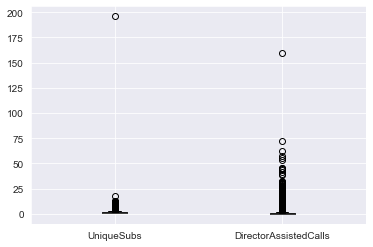

In [8]:
#plot box plot using pandas for columns "UniqueSubs" and "DirectorAssistedCalls"
newcust_df.dropna(inplace = True)
cols=["UniqueSubs","DirectorAssistedCalls"]
newcust_df.boxplot(column=cols)

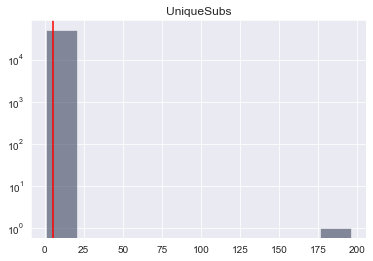

[5.]


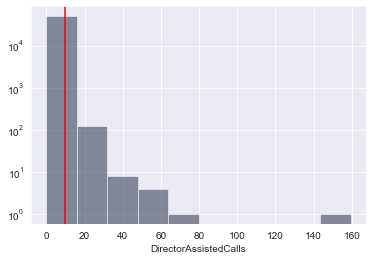

[9.65]


In [9]:
#Use "quantile" function to identify top 1% outliers
uniquesub_99 = np.quantile(newcust_df['UniqueSubs'], [0.99])
plt.hist(newcust_df['UniqueSubs'], log = True, alpha = 0.5)
plt.axvline(uniquesub_99, color = 'red')
plt.title('UniqueSubs')
plt.show()
print(uniquesub_99);

directorassisted_99 = np.quantile(newcust_df["DirectorAssistedCalls"], [0.99])
plt.hist(newcust_df["DirectorAssistedCalls"], log=True, alpha = 0.5)
plt.axvline(directorassisted_99, color = 'red')
plt.xlabel('DirectorAssistedCalls')
plt.show();
print(directorassisted_99);

<AxesSubplot:>

(49066, 58)

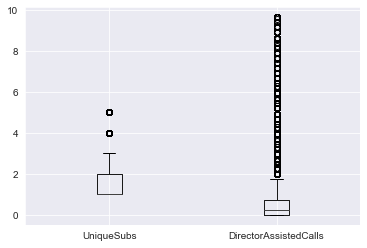

In [10]:
#Remove top 1% outliers from the above mentioned two columns and plot the box plot again
newcust_df = newcust_df[(newcust_df['UniqueSubs'] <=5) & (newcust_df['DirectorAssistedCalls'] <=9.65)]
newcust_df.boxplot(cols)
newcust_df.shape

## Q2. Perform exploratory analysis to analyze customer churn

### Q2.1 Does customers with high overage minutes also have high revenue?

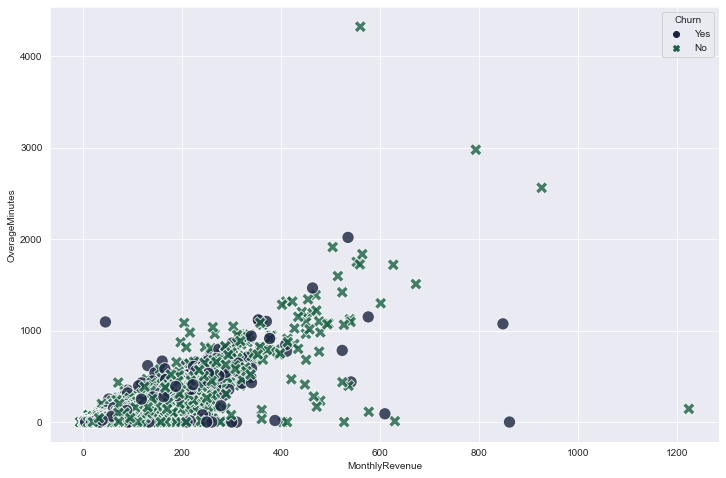

In [11]:
#use scatter plot to find the correlation between monthly revenue and overage minutes
#sns.set_context('notebook', font_scale = 1.5)
plt.figure(figsize=(12,8))
sns.scatterplot(x = 'MonthlyRevenue', y = 'OverageMinutes', data =newcust_df, hue = 'Churn',style = 'Churn', alpha = 0.8, s = 150)
plt.show();

In [12]:
newcust_df[['OverageMinutes','MonthlyRevenue' ]].corr().round(2)

,OverageMinutes,MonthlyRevenue
OverageMinutes,1.00,0.78
MonthlyRevenue,0.78,1.00


<mark>__Result:__
    
Type your interpretation here based on the scatter plot analysis
    <br>
    <span style = 'color: red'> __Answer__:The two variables have a correlation of r value 0.78. Therefore they have a strong correlation as r > 0.7.The more overage minutes that users have due to exceeding their monthly subscription allotment, the more monthly revenue they contribute. This is likely due to the accumuation of premiums charged on overage minutes.

### Q2.2 Does high number of active subscribers lead to low monthly revenue?

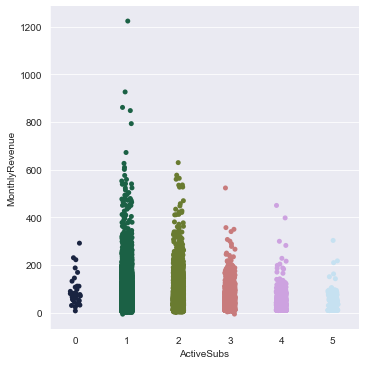

In [13]:
#use category plot to plot monthly revenue for each active subs category
sns.catplot(data = newcust_df, x ='ActiveSubs', y = 'MonthlyRevenue')

<mark>__Result:__
    
Type your interpretation here based on the category plot analysis
        <br>
    <span style = 'color: red'> __Answer__: Higher number of active subscribers leads to lower monthly revenue. Users having more than one active subscription could be long time customers or low usage customers receiving bulk
discounts or choosing to retain outdated subscription contracts where they were charged less for less usage.

### Q2.3 Does credit rating have an impact in churn rate?

In [14]:
newcust_df['Churn']=np.where((newcust_df['Churn'] == 'Yes'), 1, 0).astype('int64')

In [15]:
newcust_df['CreditRating'] = newcust_df['CreditRating'].astype('category')# for graph order sequence purpose

In [16]:
# Use for manual bar plot below
churn0 = newcust_df[newcust_df['Churn']== 0]
churn1 = newcust_df[newcust_df['Churn']== 1]
churn0 = churn0.groupby('CreditRating')['CustomerID'].count().reset_index()
churn1 = churn1.groupby('CreditRating')['CustomerID'].count().reset_index()

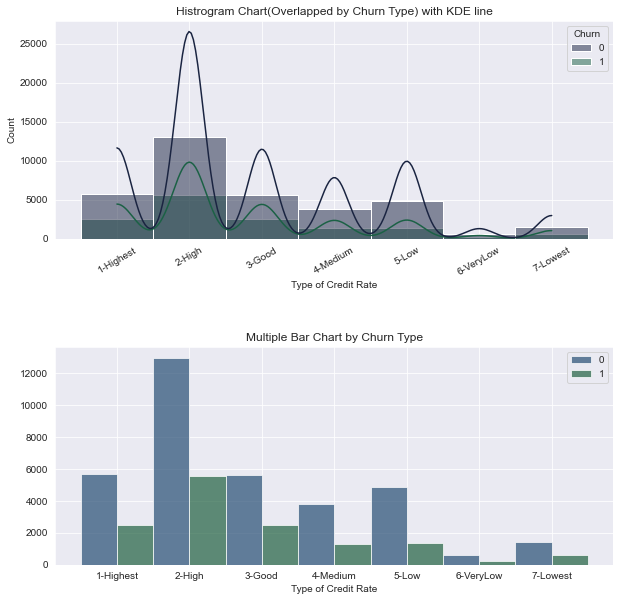

In [17]:
sns.set_style('darkgrid')
plt.figure(figsize = (10,10))
plt.subplots_adjust(hspace = 0.5)

ax1 = plt.subplot(2,1,1)
sns.histplot(x='CreditRating', hue = 'Churn',data=newcust_df, kde = True)
plt.xticks(rotation = 30);
ax1.set_title('Histrogram Chart(Overlapped by Churn Type) with KDE line')
ax1.set_xlabel('Type of Credit Rate')



ax2 = plt.subplot(2,1,2)
w= 0.5
xbar1 = np.arange(len(churn0['CreditRating']))
xbar2 = [i+w for i in xbar1]
#print(xbar1, xbar2)
#sns.set_style('ticks')
plt.bar(xbar1, churn0['CustomerID'],0.5, color ='#264d73', alpha = 0.7,label ='0')
plt.bar(xbar2, churn1['CustomerID'], 0.5, color ='#206040', alpha = 0.7,label ='1')
plt.xticks(xbar1+w/2, churn0['CreditRating'])
plt.title('Multiple Bar Chart by Churn Type')
plt.legend()
ax2.set_xlabel('Type of Credit Rate')
plt.show();


In [18]:
churncredit_rate = pd.crosstab(newcust_df['Churn'], newcust_df['CreditRating']).apply(lambda x: round(x/x.sum(),2), axis = 0)
#use axis = 0, calculate the proportion value by column, typical is axis =1, but crosstab use axis = 0 for columns
print(churncredit_rate)
print('\n\n')
churn_credit= pd.crosstab(newcust_df['Churn'], newcust_df['CreditRating'])#.apply(lambda x: round(x/x.sum(),2), axis = 0)
print(churn_credit)
chi2,pval,dof,expected = chi2_contingency(churn_credit)
print(pval)

CreditRating  1-Highest  2-High  3-Good  4-Medium  5-Low  6-VeryLow  7-Lowest
Churn                                                                        
0                  0.69     0.7    0.69      0.74   0.78       0.74      0.71
1                  0.31     0.3    0.31      0.26   0.22       0.26      0.29



CreditRating  1-Highest  2-High  3-Good  4-Medium  5-Low  6-VeryLow  7-Lowest
Churn                                                                        
0                  5685   12977    5603      3827   4851        627      1448
1                  2513    5560    2490      1327   1350        225       583
4.0790272665668016e-44


<mark>__Result:__
    
Type your interpretation here based on the analysis above
    <br>
    <span style ='color:red'>__Answer__: 
    <br> 
    H0 : Both categorical variables have no relationship
    <br>
    H1 : Both categorical variables have relationship
    <br>
    Based on the P_value from chi2_contingency test by provided significant threshold of 0.05, 4.0790272665668016e-44 show that there is significant result. Therefore, we rejected H0.
    <br>
    Churn seems to be highest at high credit rating but lower for users with low credit rating. Persons with good credit rating have more flexibility in terms of service provider hopping as they are not likely to be tied down to 1 provider due to outstanding bills/payments

## Q3. Create additional features to help predict churn

In [19]:
# Fill na for columns for aggregation purpose when creating feature
newcust_df['CreditRating'] = newcust_df['CreditRating'].astype('object')#previously converting for graph purpose, now converting it back to object

In [20]:
#wrapper function to create additional features for churn prediction
def create_features(newcust_df):
    
    #3.1 Percent of current active subs over total subs
    newcust_df['perc_active_subs'] = newcust_df['ActiveSubs'] / newcust_df['UniqueSubs']
    
    #3.2 Percent of recurrent charge to monthly charge
    #type your code here to create a new column in cust_df
    newcust_df['perc_recurrent_charge']= newcust_df['TotalRecurringCharge']/newcust_df['MonthlyRevenue'] 
    
    #3.3 Percent of overage minutes over total monthly minutes
    #type your code here to create a new column in cust_df
    newcust_df['perc_overage_charge'] = newcust_df['OverageMinutes']/newcust_df['MonthlyMinutes']
    
    #type your code here to creat any other additional features which you think will help improve your model accuracy
    
    return newcust_df  


In [21]:
#Make a call to the feature engineering wrapper function for churn prediction
newcust_df=create_features(newcust_df)
newcust_df.fillna(0, inplace = True) # to replace those nan value after create_features function

## Q4. Build classification model to predict customer churn month in advance

### Initial data processing for model building exercise

In [22]:
#Cleaning and Pre-processing the categorical/object variables before fitting and standard scaling
df_obj =newcust_df.select_dtypes('object')
df_obj['HandsetPrice'] = df_obj['HandsetPrice'].replace('Unknown', 0).astype('int64')#original is object, converting into numeric
df_obj = df_obj.drop(columns ={'ServiceArea'})# ServiceArea have 700+ unique value, removed it 
#Encoding the ordinal categorical variables , Credit Rating
oe = OrdinalEncoder()

df_obj['EncodedCreditType'] = oe.fit_transform(np.array(df_obj['CreditRating']).reshape(-1,1))#converting ordinal categorical variables into numeric
df_obj.drop(columns ={'CreditRating'}, inplace = True) # after encoded with ordinalencoder
df_obj = pd.get_dummies(df_obj) #converting all binary categorical variables into 0,1
df_obj

,HandsetPrice,EncodedCreditType,ChildrenInHH_No,ChildrenInHH_Yes,HandsetRefurbished_No,HandsetRefurbished_Yes,HandsetWebCapable_No,HandsetWebCapable_Yes,TruckOwner_No,TruckOwner_Yes,RVOwner_No,RVOwner_Yes,Homeownership_Known,Homeownership_Unknown,BuysViaMailOrder_No,BuysViaMailOrder_Yes,RespondsToMailOffers_No,RespondsToMailOffers_Yes,OptOutMailings_No,OptOutMailings_Yes,NonUSTravel_No,NonUSTravel_Yes,OwnsComputer_No,OwnsComputer_Yes,HasCreditCard_No,HasCreditCard_Yes,NewCellphoneUser_No,NewCellphoneUser_Yes,NotNewCellphoneUser_No,NotNewCellphoneUser_Yes,OwnsMotorcycle_No,OwnsMotorcycle_Yes,MadeCallToRetentionTeam_No,MadeCallToRetentionTeam_Yes,PrizmCode_Other,PrizmCode_Rural,PrizmCode_Suburban,PrizmCode_Town,Occupation_Clerical,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student,MaritalStatus_No,MaritalStatus_Unknown,MaritalStatus_Yes
0,30,0.0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
1,30,3.0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
2,0,2.0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
3,10,3.0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,10,0.0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,0,1,0,1,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51033,0,0.0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
51037,0,2.0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
51040,0,0.0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
51041,30,4.0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [23]:
df_num = newcust_df.select_dtypes('number')# filtered out those ob and get only numbers, easier combie with df_obj
clean_df =pd.concat([df_num, df_obj],axis=1)# combine both df in horizontal
clean_df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,perc_active_subs,perc_recurrent_charge,perc_overage_charge,HandsetPrice,EncodedCreditType,ChildrenInHH_No,ChildrenInHH_Yes,HandsetRefurbished_No,HandsetRefurbished_Yes,HandsetWebCapable_No,HandsetWebCapable_Yes,TruckOwner_No,TruckOwner_Yes,RVOwner_No,RVOwner_Yes,Homeownership_Known,Homeownership_Unknown,BuysViaMailOrder_No,BuysViaMailOrder_Yes,RespondsToMailOffers_No,RespondsToMailOffers_Yes,OptOutMailings_No,OptOutMailings_Yes,NonUSTravel_No,NonUSTravel_Yes,OwnsComputer_No,OwnsComputer_Yes,HasCreditCard_No,HasCreditCard_Yes,NewCellphoneUser_No,NewCellphoneUser_Yes,NotNewCellphoneUser_No,NotNewCellphoneUser_Yes,OwnsMotorcycle_No,OwnsMotorcycle_Yes,MadeCallToRetentionTeam_No,MadeCallToRetentionTeam_Yes,PrizmCode_Other,PrizmCode_Rural,PrizmCode_Suburban,PrizmCode_Town,Occupation_Clerical,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student,MaritalStatus_No,MaritalStatus_Unknown,MaritalStatus_Yes
0,3000002,1,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,2.0,2.0,361.0,62.0,0.0,1,0,0,4,0,0.5,0.916667,0.000000,30,0.0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
1,3000010,1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,2.0,1.0,1504.0,40.0,42.0,0,0,0,5,0,1.0,1.000589,0.000000,30,3.0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
2,3000014,0,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,1.0,1.0,1812.0,26.0,26.0,0,0,0,6,0,1.0,1.000000,0.000000,0,2.0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
3,3000022,0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,9.0,4.0,458.0,30.0,0.0,0,0,0,6,0,1.0,0.911522,0.000000,10,3.0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,3000026,1,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,4.0,3.0,852.0,46.0,54.0,0,0,0,9,1,1.0,0.991832,0.000000,10,0.0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,0,1,0,1,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51033,3399882,1,38.34,320.0,30.0,0.99,21.0,0.0,-66.0,-8.3,12.3,2.3,22.7,1.3,0.0,99.0,23.0,3.7,135.7,112.3,14.7,0.0,1.3,35,2,2,1.0,1.0,945.0,36.0,34.0,0,0,0,6,0,1.0,0.782473,0.065625,0,0.0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
51037,3399906,0,31.92,63.0,17.0,0.00,43.0,0.0,-38.0,-13.2,0.7,0.0,8.7,0.0,0.0,14.0,0.0,0.0,16.0,14.7,0.7,0.0,0.3,30,1,1,1.0,1.0,883.0,58.0,0.0,0,0,0,3,0,1.0,0.532581,0.682540,0,2.0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
51040,3399942,0,71.99,724.0,70.0,0.00,4.0,0.9,-40.0,-2.0,14.3,1.0,23.3,0.0,1.7,70.2,25.7,0.3,262.0,12.7,15.3,0.0,0.7,30,1,1,1.0,1.0,882.0,50.0,60.0,0,0,0,7,0,1.0,0.972357,0.005525,0,0.0,1

In [24]:
#Train - test split to train and test model accuracy
from sklearn.model_selection import train_test_split
from sklearn import metrics
#Define columns to be included in X and y
# x = Independent variables
# y = Dependent variable (churn flag)

x = clean_df.drop(columns = {'Churn', 'CustomerID'})
y = clean_df['Churn']

#Feature scaling for all continuous variable
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(x)
x_scaled_reversed = sc.inverse_transform(x_scaled)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,test_size=0.2, random_state=8)
print(x_train.shape, x_test.shape)


(39252, 86) (9814, 86)


### Q4.1 Build a simple logistic regression model to predict churn and evaluate model accuracy on test data set


In [25]:
#-------------------------------- Model training -------------------------------#
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
#type your code to build logistic regression model on training data set
log_rerc = LogisticRegression()
log_rerc.fit(x_train, y_train)

LogisticRegression()

Gini:  0.25407406856597103
roc_auc_score for log_rerc_class:  0.6270370342829855


<Figure size 504x504 with 0 Axes>

Text(0.5, 1.0, 'ROC Curve(LogisticRegression)')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

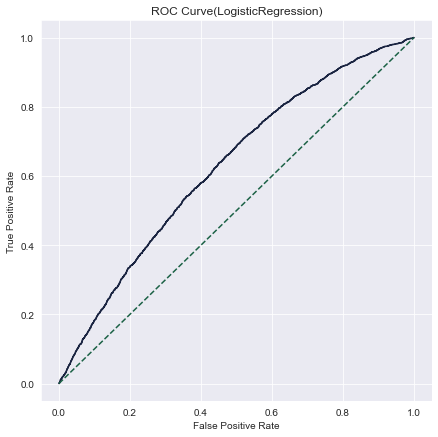

Model Score:  0.7169349908294274


              precision    recall  f1-score   support

           0       0.72      0.98      0.83      7078
           1       0.39      0.03      0.05      2736

    accuracy                           0.72      9814
   macro avg       0.56      0.51      0.44      9814
weighted avg       0.63      0.72      0.62      9814



In [26]:
#-------------------------------- Model testing ---------------------------------#

#type your code here to predict for X_test data set using the fitted model
y_predict = log_rerc.predict(x_test)
#Use a probability threshold to classify customers as churners and non churners (Default = 0.5)
y_logpredict_prob = log_rerc.predict_proba(x_test)

#Evaluate model accuracy using fitted y value and actual y_test
#Evaluatio metrics to be used - GINI, Precision, Recall, confusion matrix
y_logpredict_cur = log_rerc.predict_proba(x_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_logpredict_cur)

GINI_log = 2*(metrics.auc(false_positive_rate1, true_positive_rate1))-1
print('Gini: ', GINI_log)
print('roc_auc_score for log_rerc_class: ', roc_auc_score(y_test, y_logpredict_cur))

plt.figure(figsize=(7,7))
plt.title('ROC Curve(LogisticRegression)')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();


print("Model Score: ", log_rerc.score(x_test,y_test))
print('\n')
print(metrics.classification_report(y_test, y_predict))

### Q4.2 Build Random Forest classifier to compare model accuracy over the logistic regression model


In [27]:
#-------------------------------- Model training -------------------------------#

#type your code to build random forest classifier model on training data set
from sklearn.ensemble import RandomForestClassifier
rf_class = RandomForestClassifier(random_state= 0, n_estimators = 200)
rf_class.fit(x_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=0)

Gini:  0.3327778066953193
roc_auc_score for rf_class:  0.6663889033476597


<Figure size 504x504 with 0 Axes>

Text(0.5, 1.0, 'ROC(RandomForest)')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

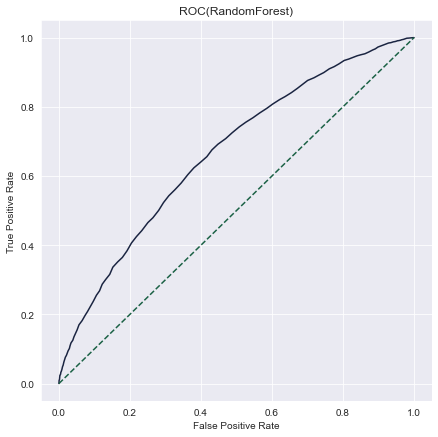

Model Score:  0.7288567352761361


              precision    recall  f1-score   support

           0       0.73      0.98      0.84      7078
           1       0.63      0.07      0.12      2736

    accuracy                           0.73      9814
   macro avg       0.68      0.53      0.48      9814
weighted avg       0.70      0.73      0.64      9814



In [28]:
#-------------------------------- Model testing ---------------------------------#

#type your code here to predict for X_test data set using the fitted RF model
y_rf_predict= rf_class.predict(x_test)
#Use a probability threshold to classify customers as churners and non churners (Default = 0.5)
y_rfpredict_prob = rf_class.predict_proba(x_test)

#Evaluate model accuracy using fitted y value and actual y_test
#Evaluatio metrics to be used - GINI, Precision, Recall, confusion matrix
y_rfpredict_cur = rf_class.predict_proba(x_test)[:,1]
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_rfpredict_cur)

GINI_rf = 2*(metrics.auc(false_positive_rate2, true_positive_rate2))-1
print('Gini: ', GINI_rf)

print('roc_auc_score for rf_class: ', roc_auc_score(y_test, y_rfpredict_cur))

plt.figure(figsize=(7,7))
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.title('ROC(RandomForest)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();


print("Model Score: ", rf_class.score(x_test,y_test))
print('\n')
print(metrics.classification_report(y_test, y_rf_predict))

<mark>__Result:__
    
Type your answer from the model building exercise here, i.e., which model has better accuracy and using what metrics?
    <br>
    <span style = 'color:Red'> __Answer__:
Random Forest Classifier is a better model as it has a higher model accuracy of 73% as compared to Logistic Regression Model and a higher recall value of 0.07 which is closer to predicting the actual results as shown under the classification report.





### Q4.3 Identify most important features impacting churn

In [29]:
# Type your code here to plot the top 20 important predictor features impacting churn using the Random Forest model created

important_feature = pd.Series(rf_class.feature_importances_, index=x.columns).sort_values(ascending = False).reset_index()

# top20_list = []
# for i in important_feature.iloc[:19,:]['index']:
#     top20_list.append(i)
# top20_list
important_feature_tabular = pd.DataFrame({'Columns':x.columns, 'Score':rf_class.feature_importances_}).sort_values(by='Score',ascending = False)
important_feature_tabular.head(20)

,Columns,Score
26,CurrentEquipmentDays,0.053330
6,PercChangeMinutes,0.045780
1,MonthlyMinutes,0.043894
35,perc_recurrent_charge,0.040539
21,MonthsInService,0.040106
0,MonthlyRevenue,0.038185
7,PercChangeRevenues,0.037779
16,PeakCallsInOut,0.034865
17,OffPeakCallsInOut,0.033977
13,ReceivedCalls,0.032961


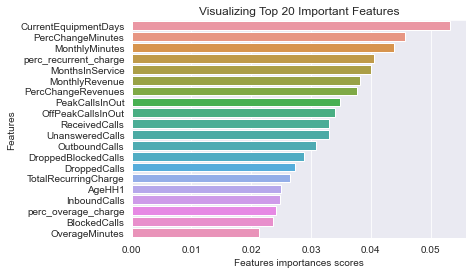

CurrentEquipmentDays is the most important feature impacting Churn.


In [30]:
show = pd.Series(rf_class.feature_importances_, index=x.columns).sort_values(ascending=False)
show_top20 = show.nlargest(20)
# Creating a seaborn bar plot
sns.barplot(x=show_top20, y=show_top20.index)
# Add labels to the graph
plt.xlabel('Features importances scores')
plt.ylabel('Features')
# Add title to the graph
plt.title('Visualizing Top 20 Important Features')
# Visualize the graph
plt.show()
print('CurrentEquipmentDays is the most important feature impacting Churn.');

## Q5. Use the hold out data provided to predict churners using the best model identified in step 4 

In [31]:
holdout_df = pd.read_csv('Mini_Project_3_Hold_Out_Data.csv')

In [32]:
holdout_df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000006,NaN,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,8.3,1.0,61.3,1.7,0.3,55.3,46.3,6.3,83.7,157.0,9.3,0.0,5.7,56,1,1,MILMIL414,7,6,240,30.0,0.0,No,No,Yes,Yes,Yes,Unknown,Yes,Yes,No,No,No,Yes,0,0,No,Yes,0,5,No,1,150,No,5-Low,Other,Other,No
1,3000018,NaN,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,9.7,0.7,77.0,8.7,0.0,106.3,14.7,0.7,97.3,90.3,10.3,0.0,0.0,57,1,1,NNYSYR315,6,4,434,56.0,0.0,No,No,Yes,No,No,Known,No,No,No,No,Yes,Yes,0,0,Yes,No,0,6,No,2,80,No,1-Highest,Other,Professional,No
2,3000034,NaN,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,12.7,3.0,176.0,11.3,0.3,213.9,103.3,0.3,238.3,192.3,15.7,0.0,4.0,55,1,1,MILMIL414,3,3,700,38.0,24.0,No,No,No,No,No,Unknown,No,No,No,No,No,No,0,0,Yes,No,0,4,No,3,10,No,3-Good,Suburban,Crafts,Yes
3,3000070,NaN,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,2.0,0.7,17.3,0.0,0.0,33.1,8.0,4.7,48.3,7.0,2.7,0.0,0.3,59,3,2,SLCSLC801,6,5,48,46.0,0.0,Yes,No,Yes,Yes,Yes,Known,Yes,Yes,Yes,No,No,Yes,0,0,No,Yes,0,4,No,1,200,No,1-Highest,Other,Other,No
4,3000074,NaN,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,2.7,6.0,43.7,4.3,0.0,490.1,50.7,8.3,189.3,105.0,8.7,0.0,4.3,52,1,1,OKCTUL918,4,4,408,58.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,Yes,0,3,No,0,10,No,1-Highest,Suburban,Other,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,3399938,NaN,85.15,815.0,88.0,0.00,1.0,0.4,0.0,0.0,12.0,0.0,15.3,0.0,1.3,141.0,9.0,3.3,72.0,38.7,12.0,0.0,0.0,27,3,2,LAXVNY818,3,3,230,64.0,64.0,No,No,Yes,No,No,Unknown,No,No,No,No,No,Yes,0,0,No,No,0,0,No,0,40,No,1-Highest,Other,Other,Unknown
19996,3399950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,1.7,0.0,0.0,0.0,25,1,1,LAXRIV909,1,1,773,34.0,26.0,No,No,Yes,No,No,Known,No,No,No,No,Yes,Yes,0,0,No,No,0,6,No,0,Unknown,No,1-Highest,Suburban,Other,Yes
19997,3399966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.3,0.7,0.3,5.3,3.3,0.0,0.0,0.0,25,1,1,LAXCOR909,1,1,773,0.0,0.0,No,No,Yes,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,8,No,1,Unknown,No,1-Highest,Suburban,Other,No
19998,3399970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,3.3,26.7,4.3,0.0,235.4,35.0,3.3,146.3,115.3,22.3,0.0,6.3,25,1,1,LAXLAG949,3,2,32,28.0,48.0,No,No,Yes,No,No,Unknown,No,No,No,No,No,Yes,0,0,No,No,0,3,No,0,150,No,3-Good,Other,Other,Unknown


In [33]:
#Type your code here to predict churners based on the hold out data set provided
#Note #1: use "create_features(cust_df)" functions to create the additional list of features in the hold out data set
#Note #2: Also, perform feature scaling and dummy variables creation as performed during the initial stages of step #4

#plt.boxplot(holdout_df[['UniqueSubs','DirectorAssistedCalls']]) #some extreme outliers, decide whether to remove or trimming it down

#Use "predict" function on the transformend data using the best fitted model object
holdout_df = create_features(holdout_df)
holdout_df.fillna(0, inplace = True) #fill na after create new features
holdout_df.isna().sum()

CustomerID               0
Churn                    0
MonthlyRevenue           0
MonthlyMinutes           0
TotalRecurringCharge     0
                        ..
Occupation               0
MaritalStatus            0
perc_active_subs         0
perc_recurrent_charge    0
perc_overage_charge      0
Length: 61, dtype: int64

In [34]:
#Cleaning and Pre-processing the categorical/object variables before fitting and standard scaling
df_obj_ho =holdout_df.select_dtypes('object')
df_obj_ho['HandsetPrice'] = df_obj_ho['HandsetPrice'].replace('Unknown', 0).astype('int64')#original is object, converting into numeric
df_obj_ho = df_obj_ho.drop(columns ={'ServiceArea'})# ServiceArea have 700+ unique value, removed it 
#Encoding the ordinal categorical variables , Credit Rating
oe = OrdinalEncoder()
df_obj_ho['EncodedCreditType'] = oe.fit_transform(np.array(df_obj_ho['CreditRating']).reshape(-1,1))
df_obj_ho.drop(columns ={'CreditRating'}, inplace = True) # after encoded with ordinalencoder
df_obj_ho = pd.get_dummies(df_obj_ho) #converting all binary categorical variables into 0,1
df_obj_ho

,HandsetPrice,EncodedCreditType,ChildrenInHH_No,ChildrenInHH_Yes,HandsetRefurbished_No,HandsetRefurbished_Yes,HandsetWebCapable_No,HandsetWebCapable_Yes,TruckOwner_No,TruckOwner_Yes,RVOwner_No,RVOwner_Yes,Homeownership_Known,Homeownership_Unknown,BuysViaMailOrder_No,BuysViaMailOrder_Yes,RespondsToMailOffers_No,RespondsToMailOffers_Yes,OptOutMailings_No,OptOutMailings_Yes,NonUSTravel_No,NonUSTravel_Yes,OwnsComputer_No,OwnsComputer_Yes,HasCreditCard_No,HasCreditCard_Yes,NewCellphoneUser_No,NewCellphoneUser_Yes,NotNewCellphoneUser_No,NotNewCellphoneUser_Yes,OwnsMotorcycle_No,OwnsMotorcycle_Yes,MadeCallToRetentionTeam_No,MadeCallToRetentionTeam_Yes,PrizmCode_Other,PrizmCode_Rural,PrizmCode_Suburban,PrizmCode_Town,Occupation_Clerical,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student,MaritalStatus_No,MaritalStatus_Unknown,MaritalStatus_Yes
0,150,4.0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,80,0.0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,10,2.0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
3,200,0.0,0,1,1,0,0,1,0,1,0,1,1,0,0,1,0,1,0,1,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,10,0.0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,40,0.0,1,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
19996,0,0.0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
19997,0,0.0,1,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
19998,150,2.0,1,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [35]:
df_num_ho = holdout_df.select_dtypes('number')# filtered out those ob and get only numbers, easier combie with df_obj
clean_df_ho =pd.concat([df_num_ho, df_obj_ho],axis=1)# combine both df in horizontal
clean_df_ho #train column is 88 , here is 87, because i removed churn from holdout_df at first

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,perc_active_subs,perc_recurrent_charge,perc_overage_charge,HandsetPrice,EncodedCreditType,ChildrenInHH_No,ChildrenInHH_Yes,HandsetRefurbished_No,HandsetRefurbished_Yes,HandsetWebCapable_No,HandsetWebCapable_Yes,TruckOwner_No,TruckOwner_Yes,RVOwner_No,RVOwner_Yes,Homeownership_Known,Homeownership_Unknown,BuysViaMailOrder_No,BuysViaMailOrder_Yes,RespondsToMailOffers_No,RespondsToMailOffers_Yes,OptOutMailings_No,OptOutMailings_Yes,NonUSTravel_No,NonUSTravel_Yes,OwnsComputer_No,OwnsComputer_Yes,HasCreditCard_No,HasCreditCard_Yes,NewCellphoneUser_No,NewCellphoneUser_Yes,NotNewCellphoneUser_No,NotNewCellphoneUser_Yes,OwnsMotorcycle_No,OwnsMotorcycle_Yes,MadeCallToRetentionTeam_No,MadeCallToRetentionTeam_Yes,PrizmCode_Other,PrizmCode_Rural,PrizmCode_Suburban,PrizmCode_Town,Occupation_Clerical,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student,MaritalStatus_No,MaritalStatus_Unknown,MaritalStatus_Yes
0,3000006,0.0,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,8.3,1.0,61.3,1.7,0.3,55.3,46.3,6.3,83.7,157.0,9.3,0.0,5.7,56,1,1,7,6,240,30.0,0.0,0,0,0,5,1,1.000000,0.643590,0.047619,150,4.0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,3000018,0.0,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,9.7,0.7,77.0,8.7,0.0,106.3,14.7,0.7,97.3,90.3,10.3,0.0,0.0,57,1,1,6,4,434,56.0,0.0,0,0,0,6,2,1.000000,1.303639,0.000000,80,0.0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,3000034,0.0,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,12.7,3.0,176.0,11.3,0.3,213.9,103.3,0.3,238.3,192.3,15.7,0.0,4.0,55,1,1,3,3,700,38.0,24.0,0,0,0,4,3,1.000000,0.513663,0.404235,10,2.0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
3,3000070,0.0,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,2.0,0.7,17.3,0.0,0.0,33.1,8.0,4.7,48.3,7.0,2.7,0.0,0.3,59,3,2,6,5,48,46.0,0.0,0,0,0,4,1,0.666667,0.842933,0.104575,200,0.0,0,1,1,0,0,1,0,1,0,1,1,0,0,1,0,1,0,1,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,3000074,0.0,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,2.7,6.0,43.7,4.3,0.0,490.1,50.7,8.3,189.3,105.0,8.7,0.0,4.3,52,1,1,4,4,408,58.0,0.0,0,0,0,3,0,1.000000,0.904650,0.000000,10,0.0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,3399938,0.0,85.15,815.0,88.0,0.00,1.0,0.4,0.0,0.0,12.0,0.0,15.3,0.0,1.3,141.0,9.0,3.3,72.0,38.7,12.0,0.0,0.0,27,3,2,3,3,230,64.0,64.0,0,0,0,0,0,0.666667,1.033470,0.001227,40,0.0,1,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
19996,3399950,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,1.7,0.0,0.0,0.0,25,1,1,1,1,773,34.0,26.0,0,0,0,6,0,1.000000,0.000000,0.000000,0,0.0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
19997,3399966,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.3,0.7,0.3,5.3,3.3,0.0,0.0,0.0,25,1,1,1,1,773,0.0,0.0,0,0,0,8,1,1.000000,0.000000,0.000000,0,0

In [36]:
x_ho = clean_df_ho.drop(columns = {'CustomerID', 'Churn'})

x_scaled_ho =sc.fit_transform(x_ho)


PredictChurn = rf_class.predict(x_scaled_ho)

x_ho['PredictChurn'] = pd.Series(PredictChurn)

np.sum(x_ho['PredictChurn']==1)

474

<span style = 'color : Red'>__Answer__: Using the best model from step 4, we predicted churn of 474 from the Holdout data.

## Q6. [Bonus Question] Calculate lift chart and total monthly revenue saved by targeting top 10-20% of the customers using your best predictive model

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

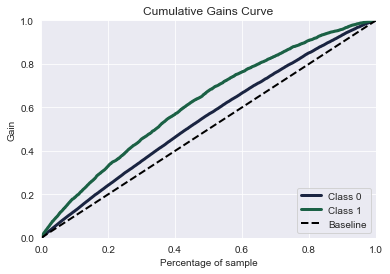

<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

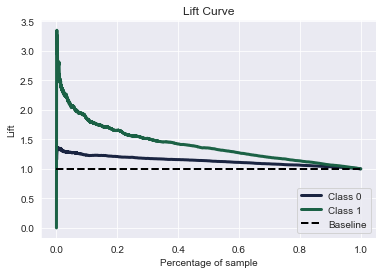

In [37]:
#Type your code here to plot the lift chart from the best model
#Identify the lift i.e. 3x of capturing churn with and without using the model 
#(Assume: only top 20% high risk customers are to be targetted)

#!pip install scikit-plot
import scikitplot as skplt

#plotting cumulative gains chart from best model
skplt.metrics.plot_cumulative_gain(y_test, y_rfpredict_prob)
plt.show()

#plotting lift chart
skplt.metrics.plot_lift_curve(y_test, y_rfpredict_prob)
#plt.legend(loc='upper right')
plt.show()

<mark>__Result:__
    
1. What is the % actual churn captured by targeting top 20% (top 2 deciles) of the customers sorted by their churn probability?
    
    <span style = 'color : Red'>__Answer__: 
    <br>
    Based on the cumulative gains chart, if we target top 20% of customers by churn probability, the model will capture over approximately 34% of actual churn. The lift chart likewise shows that if we target top 20% of customers by churn probability, our model would be able to predict approximately 1.7 times better than without it.

In [38]:
#Remove scaling
x_scaled_reversed = sc.inverse_transform(x_test)
x_scaled_reversed

array([[ 4.86171307e+01,  3.31527346e+02,  5.99724691e+01, ...,
        -7.21659543e-04,  1.01084187e+00, -5.61286526e-03],
       [ 7.38402168e+01,  8.30680523e+02,  5.57751625e+01, ...,
         9.97870816e-01,  6.58606832e-03, -5.61286526e-03],
       [ 1.05630199e+02,  6.28518276e+02,  5.68244892e+01, ...,
        -7.21659543e-04,  1.01084187e+00, -5.61286526e-03],
       ...,
       [ 2.63207085e+01,  9.49766749e+01,  2.42953632e+01, ...,
        -7.21659543e-04,  1.01084187e+00, -5.61286526e-03],
       [ 3.93304020e+01,  1.95015725e+02,  4.52818961e+01, ...,
        -7.21659543e-04,  6.58606832e-03,  9.90399459e-01],
       [ 7.65910741e+01,  7.86913438e+02,  7.67616954e+01, ...,
        -7.21659543e-04,  6.58606832e-03,  9.90399459e-01]])

In [39]:
#Getting sum of total monthly revenue
reversed_df = pd.DataFrame(x_scaled_reversed, columns = [x.columns.values])
reversed_df['MonthlyRevenue'].sum()

MonthlyRevenue    582579.439054
dtype: float64

In [40]:
qn6_df  =reversed_df['MonthlyRevenue']

In [41]:
qn6_df = pd.concat([qn6_df,pd.Series(y_rfpredict_prob[:,1])], axis = 1)# Run 1 times only

In [42]:
qn6_df.columns = ['MonthlyRevenue','Churn1_Prob']

In [43]:
y_test_df = pd.DataFrame(y_test).reset_index(drop = True)

In [44]:
#creating a dataframe to compare probability of churning vs actual churn
qn6_df['Y-test'] = y_test_df
qn6_df_sort = qn6_df.sort_values(by = 'Churn1_Prob', ascending = False).reset_index(drop=True).iloc[:1963,:]
qn6_df_sort

,MonthlyRevenue,Churn1_Prob,Y-test
0,9.370877,0.800,0
1,30.043673,0.790,1
2,4.200093,0.775,1
3,9.370877,0.770,1
4,50.726811,0.755,1
...,...,...,...
1958,97.729241,0.390,0
1959,106.095570,0.390,1
1960,64.677587,0.390,1
1961,106.033520,0.390,0


In [45]:
round(qn6_df_sort[qn6_df_sort['Y-test']==1]['MonthlyRevenue'].sum(),2)

52274.29

In [46]:
round(qn6_df['MonthlyRevenue'].sum(),2)

582579.44

In [47]:
round(qn6_df['MonthlyRevenue'].sum(),2)/round(qn6_df_sort[qn6_df_sort['Y-test']==1]['MonthlyRevenue'].sum(),2)

11.144664805586071

<mark>__Result:__
    
2. What is the total monthly revenue of actual churn customers identified in the top 20% of the customers?
    
    <span style = 'color : Red'>__Answer__: 
    <br>
    Based on the top 20% of customers by churn probability, the total monthly revenue of actual churn customers adds up to \$52274.29, which is approximately 11% of the total sample's monthly revenue \$582579.44.